In [1]:
import numpy as np
from scipy.io.wavfile import read
from python_speech_features import mfcc, delta
import os
import _pickle as pickle
from sklearn.mixture import GMM
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import pyaudio
import wave

In [2]:
# Preprocessing - ver2: get MFCC-delta2
def Train_MFCC_delta2(sr, audio):
    mfcc_feat = mfcc(audio,sr, 0.025, 0.01, 13,nfft=2048,appendEnergy = False)
    d_mfcc_feat = delta(mfcc_feat,2)
    dd_mfcc_feat = delta(d_mfcc_feat,2)
    features = np.asarray(())
    features = np.hstack([mfcc_feat, d_mfcc_feat, dd_mfcc_feat])
    features = preprocessing.scale(features)
    return features

In [3]:
def Test_MFCC_delta2(sr,audio):
    mfcc_feat = mfcc(audio,sr, 0.025, 0.01, 13, nfft=2048,appendEnergy = False)
    d_mfcc_feat = delta(mfcc_feat,2)
    dd_mfcc_feat = delta(d_mfcc_feat,2)
    features = np.asarray(())
    features = np.hstack([mfcc_feat, d_mfcc_feat, dd_mfcc_feat])
    #features = [np.concatenate((i,np.zeros((1208-i.shape[0],39)))) for i in features]
    feat = np.asarray(())
    
    for i in range(features.shape[0]):
        temp = features[i,:]
        if np.isnan(np.min(temp)):
            continue
        else:
            if feat.size == 0:
                feat = temp
            else:
                feat = np.vstack((feat, temp))
                
    features = feat
    
    # SD
    features = preprocessing.scale(features)
    return features

# Debug

In [40]:
sourcepath = "C:\\Users\\user\\Desktop\\科研部_SR\\audio dataset\\Test\\任卓英\\"
modelpath  = "C:\\Users\\user\\Desktop\\科研部_SR\\model\\"  
gmm_files = [os.path.join(modelpath,fname) for fname in os.listdir(modelpath) if fname.endswith('.gmm')]
models    = [pickle.load(open(fname,'rb')) for fname in gmm_files]
files = [os.path.join(sourcepath,fname) for fname in os.listdir(sourcepath) if fname.endswith('.wav')]
people   = [fname.split("\\")[-1].split(".gmm")[0] for fname in gmm_files]
diff = []

for f in files:
    sr, y = read(f)
    features= Test_MFCC_delta2(sr,y)
    scores= None
    log_likelihood= np.zeros(len(models)) 
    
    for i in range(len(models)):
        gmm= models[i]         #checking with each model one by one
        scores= np.array(gmm.score(features))
        log_likelihood[i] = scores.sum()
        
    winner = np.argmax(log_likelihood)
    
    for i in range(len(models)):
        a = abs(log_likelihood[i]-log_likelihood[winner])
        if(a>0):
            diff.append(a)
    
    #print('\tdetected as - ', people[winner])
    close = np.argmin(diff)
    print(close)
    #print(min(diff))
    print(people[close],' is the closest ',diff[close])
    diff = []

3
徐天鴻  is the closest  1561.996657566502
12
陳亭嘉  is the closest  1301.6990847067573
10
賴昇頤  is the closest  1506.2878987459408
7
洪立全  is the closest  757.7568746323523
12
陳亭嘉  is the closest  909.3786946324981
10
賴昇頤  is the closest  1174.020406731186
10
賴昇頤  is the closest  3155.069802934653
3
徐天鴻  is the closest  3295.532103006015
3
徐天鴻  is the closest  1643.0339856859791
3
徐天鴻  is the closest  1417.1825046079684
15
陳慶安  is the closest  3270.346103525604
12
陳亭嘉  is the closest  996.9996459452886
15
陳慶安  is the closest  1634.8855968795833
3
徐天鴻  is the closest  2041.543692598927
10
賴昇頤  is the closest  2980.1930311879114
10
賴昇頤  is the closest  2016.056559034565
10
賴昇頤  is the closest  1658.4745574633707
10
賴昇頤  is the closest  2140.061515507303
10
賴昇頤  is the closest  1177.2914639768205
10
賴昇頤  is the closest  550.9941795328268
15
陳慶安  is the closest  928.2845781022661
10
賴昇頤  is the closest  922.0469911991459
10
賴昇頤  is the closest  2176.6537558681157


In [16]:
sourcepath = "C:\\Users\\user\\Desktop\\科研部_SR\\audio dataset\\Test\\蘇玫如\\蘇玫如_"
error = ['13.wav','16.wav','35.wav','37.wav','39.wav','43.wav','48.wav']
modelpath  = "C:\\Users\\user\\Desktop\\科研部_SR\\model\\"  
gmm_files = [os.path.join(modelpath,fname) for fname in os.listdir(modelpath) if fname.endswith('.gmm')]
models    = [pickle.load(open(fname,'rb')) for fname in gmm_files]
people   = [fname.split("\\")[-1].split(".gmm")[0] for fname in gmm_files]
diff = []

for i in range(len(models)):
    if(people[i]=='蘇玫如'):
        master = i

for i in range(len(error)):
    sr, y = read(sourcepath+error[i])
    features= Test_MFCC_delta2(sr,y)
    scores= None
    log_likelihood= np.zeros(len(models)) 
    
    for i in range(len(models)):
        gmm= models[i]         #checking with each model one by one
        scores= np.array(gmm.score(features))
        log_likelihood[i] = scores.sum()

    winner = np.argmax(log_likelihood)
    print('\tdetected as - ', people[winner])
    print('Diff between master: ',abs(log_likelihood[winner]-log_likelihood[master]))
            
    for i in range(len(models)):
        diff.append(np.array(abs(log_likelihood[i]-log_likelihood[winner])))
        #print(people[i],': ',diff[i])

    close = np.argmax(diff)
    print(people[i],' is the closest ',diff[close])

	detected as -  陳冠霖
Diff between master:  104.62395721612847
陳祐嘉  is the closest  2092.3664996953157
	detected as -  任卓英
Diff between master:  334.6303006964408
陳祐嘉  is the closest  3104.602468359153
	detected as -  任卓英
Diff between master:  234.01337198766123
陳祐嘉  is the closest  6075.443108327207
	detected as -  任卓英
Diff between master:  217.39108729595318
陳祐嘉  is the closest  6075.443108327207
	detected as -  陳祐嘉
Diff between master:  17.921949424588092
陳祐嘉  is the closest  6075.443108327207
	detected as -  賴嘉平
Diff between master:  9.391812181813293
陳祐嘉  is the closest  6075.443108327207
	detected as -  任卓英
Diff between master:  164.64992750558304
陳祐嘉  is the closest  8500.448562234647


In [105]:
def Similarity(a, b, answer, predict):
    if predict==answer:
        score = 100
    else:
        score = 100 + (abs(a-b)/b*1000)
    return score

## 馬上錄音，進行 detect 1-to-1 matching

In [107]:
'''# Record a WAV file
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 1024
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "test.wav"
 
audio = pyaudio.PyAudio()
 
# start Recording
stream = audio.open(format=FORMAT, channels=CHANNELS,rate=RATE, input=True,frames_per_buffer=CHUNK)
print ("recording...")
frames = []
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)
print ("finished recording")
 
# stop Recording
stream.stop_stream()
stream.close()
audio.terminate()
 
waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()'''

sourcepath = "C:\\Users\\user\\Desktop\\科研部_SR\\5 sec sample_玫如\\"
modelpath = "C:\\Users\\user\\Desktop\\科研部_SR\\model\\" 
files  = [os.path.join(sourcepath,f) for f in os.listdir(sourcepath) if f.endswith(".wav")] 
gmm_files = [os.path.join(modelpath,fname) for fname in os.listdir(modelpath) if fname.endswith('.gmm')]
models    = [pickle.load(open(fname,'rb')) for fname in gmm_files]
people   = [fname.split("\\")[-1].split(".gmm")[0] for fname in gmm_files]

for f in files:
    sr, y = read(f)
    features= Test_MFCC_delta2(sr,y)
    scores= None
    log_likelihood= np.zeros(len(models)) 
        
    for i in range(len(models)):
        gmm= models[i]         #checking with each model one by one
        scores= np.array(gmm.score(features))
        log_likelihood[i] = scores.sum()
        
    winner = np.argmax(log_likelihood)
    print(f.split('\\')[-1].split('.wav')[0])
    #print(log_likelihood[8])
    score = Similarity(log_likelihood[8], log_likelihood[winner], people[8], people[winner])
    print('Detected as-', people[winner])
    print("Similarity: ", score ,'%')
    if score <= 90:
        print('Error ! Please try again')
    else:
        print('Correct~ May I help you, sir?')
    
    print('\n')

01
Detected as- 蘇玫如
Similarity:  100 %
Correct~ May I help you, sir?


02
Detected as- 洪立全
Similarity:  88.3922841183637 %
Error ! Please try again


03
Detected as- 蘇玫如
Similarity:  100 %
Correct~ May I help you, sir?


04
Detected as- 蘇玫如
Similarity:  100 %
Correct~ May I help you, sir?


05
Detected as- 洪立全
Similarity:  98.52826514745726 %
Correct~ May I help you, sir?


06
Detected as- 洪立全
Similarity:  83.93482254112897 %
Error ! Please try again


07
Detected as- 洪立全
Similarity:  96.88487122368446 %
Correct~ May I help you, sir?


08
Detected as- 蘇玫如
Similarity:  100 %
Correct~ May I help you, sir?


09
Detected as- 蘇玫如
Similarity:  100 %
Correct~ May I help you, sir?


10
Detected as- 蘇玫如
Similarity:  100 %
Correct~ May I help you, sir?




In [73]:
sourcepath = "C:\\Users\\user\\Desktop\\科研部_SR\\"
modelpath = "C:\\Users\\user\\Desktop\\科研部_SR\\model\\" 
files  = [os.path.join(sourcepath,f) for f in os.listdir(sourcepath) if f.endswith(".wav")] 
gmm_files = [os.path.join(modelpath,fname) for fname in os.listdir(modelpath) if fname.endswith('.gmm')]
models    = [pickle.load(open(fname,'rb')) for fname in gmm_files]
people   = [fname.split("\\")[-1].split(".gmm")[0] for fname in gmm_files]

for f in files:
    sr, y = read(f)
    features= Test_MFCC_delta2(sr,y)
    scores= None
    log_likelihood= np.zeros(len(models)) 
        
    for i in range(len(models)):
        gmm= models[i]         #checking with each model one by one
        scores= np.array(gmm.score(features))
        log_likelihood[i] = scores.sum()
        
    winner = np.argmax(log_likelihood)
    print(f.split('\\')[-1].split('.wav')[0])
    print(abs(log_likelihood[winner]-log_likelihood[8]))
    print("Detected as: ", people[winner])
    print('\n')

01
0.0
Detected as:  蘇玫如


02
297.41079205688584
Detected as:  洪立全


03
0.0
Detected as:  蘇玫如


04
0.0
Detected as:  蘇玫如


05
35.68895747955321
Detected as:  洪立全


06
405.07586533642825
Detected as:  洪立全


07
77.2846756038598
Detected as:  洪立全


08
0.0
Detected as:  蘇玫如


09
0.0
Detected as:  蘇玫如


10
0.0
Detected as:  蘇玫如




In [129]:
# Test model
sourcepath = "C:\\Users\\user\\Desktop\\科研部_SR\\raw audio dataset\\test\\柯青宏_test.wav"
modelpath  = "C:\\Users\\user\\Desktop\\科研部_SR\\model\\"  

#files  = [os.path.join(sourcepath,f) for f in os.listdir(sourcepath) if f.endswith(".wav")] 
gmm_files = [os.path.join(modelpath,fname) for fname in os.listdir(modelpath) if fname.endswith('.gmm')]
models    = [pickle.load(open(fname,'rb')) for fname in gmm_files]
people   = [fname.split("\\")[-1].split(".gmm")[0] for fname in gmm_files]
name = files[0].split('\\')[-1].split('.wav')[0]

for i in range(len(models)):
    if(people[i]==name):
        name_idx= i


sr, y = read(sourcepath)
features= Test_MFCC_delta2(sr,y)
scores= None
log_likelihood= np.zeros(len(models)) 
        
for i in range(len(models)):
    gmm= models[i]         #checking with each model one by one
    scores= np.array(gmm.score(features))
    log_likelihood[i] = scores.sum()
        
winner = np.argmax(log_likelihood)
print(sourcepath.split('\\')[-1].split('_test.wav')[0])
print(log_likelihood[winner])
print("Detected as: ", people[winner])
print('\n')

柯青宏
-1102839.1902235567
Detected as:  柯青宏




In [56]:
files

['C:\\Users\\user\\Desktop\\科研部_SR\\蘇玫如.wav']

# 正式
錄音5秒進行身分驗證。如果對，則秀出照片。如果錯誤就不予執行後續動作

In [108]:
import numpy as np
from scipy.io.wavfile import read
from python_speech_features import mfcc, delta
import os
import _pickle as pickle
from sklearn.mixture import GMM
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import pyaudio
import wave

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
%matplotlib inline

In [130]:
def Similarity(a, b, answer, predict):
    if predict==answer:
        score = 100
    else:
        score = 100 + (abs(a-b)/b*1000)
    return score

recording...
finished recording
Detected as- 蘇玫如
Similarity:  100 %


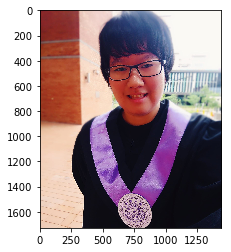

Correct~ May I help you, 蘇玫如?


In [131]:
# Record a WAV file
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 1024
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "test.wav"
 
audio = pyaudio.PyAudio()
 
# start Recording
stream = audio.open(format=FORMAT, channels=CHANNELS,rate=RATE, input=True,frames_per_buffer=CHUNK)
print ("recording...")
frames = []
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)
print ("finished recording")
 
# stop Recording
stream.stop_stream()
stream.close()
audio.terminate()
 
waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()

sourcepath = "C:\\Users\\user\\Desktop\\科研部_SR\\"
modelpath = "C:\\Users\\user\\Desktop\\科研部_SR\\model\\" 
files  = [os.path.join(sourcepath,f) for f in os.listdir(sourcepath) if f.endswith(".wav")] 
gmm_files = [os.path.join(modelpath,fname) for fname in os.listdir(modelpath) if fname.endswith('.gmm')]
models    = [pickle.load(open(fname,'rb')) for fname in gmm_files]
people   = [fname.split("\\")[-1].split(".gmm")[0] for fname in gmm_files]

# 隨時調整
owner = '蘇玫如'
for i in range(len(models)):
    if(people[i]==owner):
        owner_idx = i

for f in files:
    sr, y = read(f)
    features= Test_MFCC_delta2(sr,y)
    scores= None
    log_likelihood= np.zeros(len(models)) 
        
    for i in range(len(models)):
        gmm= models[i]         #checking with each model one by one
        scores= np.array(gmm.score(features))
        log_likelihood[i] = scores.sum()
        
    winner = np.argmax(log_likelihood)
    #print(f.split('\\')[-1].split('.wav')[0])
    #print(log_likelihood[8])
    score = Similarity(log_likelihood[owner_idx], log_likelihood[winner], people[owner_idx], people[winner])
    print('Detected as-', people[winner])
    print("Similarity: ", score ,'%')
    if score <= 90:
        image0 = Image.open('C:\\Users\\user\\Desktop\\科研部_SR\\photo\\Error.jpg', 'r')
        plt.figure()
        imshow(np.asarray(image0))
        plt.show()
        print('Error ! Please try again QAQ')
    else:
        image1 = Image.open('C:\\Users\\user\\Desktop\\科研部_SR\\photo\\'+owner+'.jpg', 'r')
        plt.figure()
        imshow(np.asarray(image1))
        plt.show()
        print('Correct~ May I help you, '+owner+'?')
    
    #print('\n')

# 計算每人的驗證相似度

In [124]:
path = "C:\\Users\\user\\Desktop\\科研部_SR\\audio dataset\\Test\\"       
folders = [os.path.join(path,f) for f in os.listdir(path)]
for i in range(len(folders)):
    folders[i] = folders[i]+'\\'

In [125]:
folders

['C:\\Users\\user\\Desktop\\科研部_SR\\audio dataset\\Test\\任卓英\\',
 'C:\\Users\\user\\Desktop\\科研部_SR\\audio dataset\\Test\\吳偉誌\\',
 'C:\\Users\\user\\Desktop\\科研部_SR\\audio dataset\\Test\\彭瑋玉\\',
 'C:\\Users\\user\\Desktop\\科研部_SR\\audio dataset\\Test\\徐天鴻\\',
 'C:\\Users\\user\\Desktop\\科研部_SR\\audio dataset\\Test\\林上淳\\',
 'C:\\Users\\user\\Desktop\\科研部_SR\\audio dataset\\Test\\林淑芳\\',
 'C:\\Users\\user\\Desktop\\科研部_SR\\audio dataset\\Test\\柯青宏\\',
 'C:\\Users\\user\\Desktop\\科研部_SR\\audio dataset\\Test\\洪立全\\',
 'C:\\Users\\user\\Desktop\\科研部_SR\\audio dataset\\Test\\蘇玫如\\',
 'C:\\Users\\user\\Desktop\\科研部_SR\\audio dataset\\Test\\賴嘉平\\',
 'C:\\Users\\user\\Desktop\\科研部_SR\\audio dataset\\Test\\賴昇頤\\',
 'C:\\Users\\user\\Desktop\\科研部_SR\\audio dataset\\Test\\邱建豪\\',
 'C:\\Users\\user\\Desktop\\科研部_SR\\audio dataset\\Test\\陳亭嘉\\',
 'C:\\Users\\user\\Desktop\\科研部_SR\\audio dataset\\Test\\陳冠霖\\',
 'C:\\Users\\user\\Desktop\\科研部_SR\\audio dataset\\Test\\陳威良\\',
 'C:\\Users\\user\\Deskto

In [126]:
modelpath = "C:\\Users\\user\\Desktop\\科研部_SR\\model\\" 
total = []

for i in range(len(folders)):
    files  = [os.path.join(folders[i],f) for f in os.listdir(folders[i]) if f.endswith(".wav")] 
    gmm_files = [os.path.join(modelpath,fname) for fname in os.listdir(modelpath) if fname.endswith('.gmm')]
    models    = [pickle.load(open(fname,'rb')) for fname in gmm_files]
    people   = [fname.split("\\")[-1].split(".gmm")[0] for fname in gmm_files]

    person = []

    # 隨時調整
    owner = folders[i].split('\\')[-2]
    for i in range(len(models)):
        if(people[i]==owner):
            owner_idx = i

    for f in files:
        sr, y = read(f)
        features= Test_MFCC_delta2(sr,y)
        scores= None
        log_likelihood= np.zeros(len(models)) 
        
        for i in range(len(models)):
            gmm= models[i]         #checking with each model one by one
            scores= np.array(gmm.score(features))
            log_likelihood[i] = scores.sum()
        
        winner = np.argmax(log_likelihood)
        #print(f.split('\\')[-1].split('.wav')[0])
        #print(log_likelihood[owner])
        score = Similarity(log_likelihood[owner_idx], log_likelihood[winner], people[owner_idx], people[winner])
        #print('Detected as-', people[winner])
        #print("Similarity: ", score ,'%')
        person.append(score)
        total.append(score)
    print(person)
    print(owner,': ',sum(person)/len(files))
print('Total_accuracy: ',sum(total)/419)

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
任卓英 :  100.0
[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, -27.15839226532671, 100, 100, 36.14620109994517, 100, 100, 100, 100, 52.69593049063483]
吳偉誌 :  90.46734957301014
[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
彭瑋玉 :  100.0
[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 98.66841327075522, 100, 96.65809326239638, 100, 56.458354515496325, 100]
徐天鴻 :  98.73118055391178
[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
林上淳 :  100.0
[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,